<div style="text-align: center;">
    <span style="color: red; font-size: 24px; font-weight: bold;">New Smartphone Review Analysis</span>
</div>

### Description:

Assist a prominent mobile brand in comprehensively understanding customer sentiment by conducting an analysis of product reviews on Amazon. Employ topic modeling techniques focusing on specific parts of speech to extract meaningful insights from the reviews. Subsequently, interpret the discerned topics to gain actionable understanding of customer preferences and concerns.

### Problem Statement: 

A prominent mobile phone manufacturer, Lenovo, has introduced their budget smartphone in the Indian market. The client seeks to grasp the Voice of the Customer (VOC) regarding the product, aiming not only to assess its current standing but also to glean insights for future product development. The client is particularly keen on understanding the diverse facets that customers prioritize. Analyzing customer reviews on a top e-commerce platform is deemed instrumental in obtaining a comprehensive perspective.

**Scope:** 
Analyzing Amazon reviews pertaining to a renowned mobile phone brand.

**Approach:** 
Conducting Part-of-Speech (POS) tagging, implementing Latent Dirichlet Allocation (LDA) for topic modeling, and interpreting emerging topics.

**Data Source:** 
Utilizing the dataset labeled 'K8 Reviews v0.2.csv.'

**Dataset Structure:** 
The dataset comprises two columns: 'Sentiment,' indicating the sentiment associated with the review (with 4 and 5-star ratings indicating positivity, while 1 and 2-star ratings denote negativity), and 'Reviews,' containing the main text of the review.

### Steps to perform:

Discover the topics in the reviews and present it to business in a consumable format. Employ techniques in syntactic processing and topic modeling.

Using syntactic processing and topic modeling techniques, we've extracted valuable insights from the reviews. Through POS tagging and filtering relevant POS tags, we employed Latent Dirichlet Allocation (LDA) for topic modeling.

**Tasks:**

1. Utilize Pandas to read the provided .csv file and display the top few records to gain an initial understanding of the data structure.

2. Normalize the casing of the review text and extract it into a list, simplifying future manipulation and analysis.

3. Tokenize the reviews using NLTK's word_tokenize function to break them down into individual words.

4. Apply parts-of-speech tagging to each sentence using NLTK's POS tagger to identify the grammatical components of the text.

5. For the topic modeling process, focus solely on nouns by identifying all the POS tags corresponding to nouns and limiting the data to terms with these tags.

6. Lemmatize the data to standardize different forms of terms into their base forms, ensuring consistency and reducing complexity.

7. Remove stopwords and punctuation from the text to enhance the quality of the data for analysis.

8. Utilize Latent Dirichlet Allocation (LDA) to create a topic model with 12 topics based on the cleaned-up data. Print out the top terms for each topic and determine the coherence of the model using the u_mass metric.

9. Analyze the topics from a business perspective to determine which ones can be combined based on their thematic similarity or relevance.

10. Fine-tune the topic model by experimenting with different numbers of topics to find the optimal configuration. Assess the coherence of this model to ensure its effectiveness.

11. Interpret the topics identified by the model and assign descriptive names to each. Present the findings in a table format, listing the topic names along with the top 10 terms for each, to facilitate business understanding and decision-making.

In [1]:
#importing basic libraries
import pandas as pd #For uploading files, data cleaing & data wrangling i.e, merging, reshaping, selecting etc. 
import numpy as np #For numerical operations
import matplotlib.pyplot as plt #For Data Visualisations
from matplotlib import style #For creating multiple Styles to Data Visualisations %matplotlib inline

import os
import warnings 
warnings.filterwarnings("ignore")

imports the Pandas library and gives it the alias pd. Pandas is a powerful library for data manipulation and analysis, particularly for working with structured data such as tables.

imports the NumPy library and gives it the alias 'np'. NumPy is a fundamental package for numerical computing with Python. It provides support for arrays, matrices, and a collection of mathematical functions to operate on these data structures efficiently.

imports the 'pyplot' module from the Matplotlib library and gives it the alias 'plt'. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. The 'pyplot' module provides a MATLAB-like interface for creating plots and visualizations.
 
imports the style module from the Matplotlib library. The style module allows you to customize the appearance of your plots by applying different predefined styles or by creating custom styles.

This is a magic command in Jupyter Notebooks or IPython environments. It ensures that Matplotlib plots are displayed inline within the notebook, allowing you to see the plots directly below the code cell that generates them.

imports the 'os' module, which provides a portable way of interacting with the operating system. It allows you to perform various operating system-related tasks, such as navigating file systems, accessing environment variables, and executing system commands.

These lines import the 'warnings' module and suppress all warnings generated by the code. Warnings are messages that alert you to potential issues or best practices in your code. In this case, the code is set to ignore warnings, which means that any warnings generated during the execution of the code will not be displayed to the user.
Overall, this code block imports essential libraries for data analysis ('Pandas' and 'NumPy'), data visualization ('Matplotlib'), and operating system interaction ('os'). It also configures Matplotlib to display plots inline and suppresses any warnings generated during code execution.

In [2]:
#importing nltk libraries
import re #regular expression for data cleaning 
from sklearn.feature_extraction.text import CountVectorizer #feature extraction
import nltk #natural language toolkit
from nltk.corpus import stopwords #stopwords
from nltk.stem import WordNetLemmatizer #lemmatizing words

imports the 're' module, which stands for regular expressions. Regular expressions are a powerful tool for pattern matching and manipulation of strings. They are often used in text processing tasks such as data cleaning.

imports the 'CountVectorizer' class from the 'sklearn.feature_extraction.text' module. 'CountVectorizer' is a tool provided by scikit-learn (sklearn) for converting a collection of text documents into a matrix of token counts. It's commonly used for feature extraction in natural language processing (NLP) tasks.

imports the 'nltk' library, which stands for Natural Language Toolkit. NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.

imports the 'stopwords' module from NLTK's corpus package. Stopwords are commonly used words in a language (e.g., "the", "is", "and") that are often filtered out before or after processing natural language data. NLTK provides a list of stopwords for several languages, which can be useful for text preprocessing tasks.

imports the 'WordNetLemmatizer' class from NLTK's stem package. Lemmatization is the process of reducing words to their base or root form. WordNetLemmatizer uses WordNet, a lexical database of English, to find the base form of words. This can be helpful for standardizing words and reducing the dimensionality of text data in NLP tasks.

In [3]:
#To display full output in Jupyter, not just last result of a particular cel
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

imports the 'InteractiveShell' class from the 'IPython.core.interactiveshell' module. 'InteractiveShell' provides the infrastructure for running interactive IPython shells.

sets the 'ast_node_interactivity' attribute of the 'InteractiveShell' instance to "all". This configuration option determines how the IPython shell handles the display of outputs. Setting it to "all" instructs IPython to display the output of all expressions in a cell, rather than just the last one.

In [4]:
# To display upto 10 rows while showing output
pd.options.display.max_rows = 10

sets the maximum number of rows to display when showing Pandas DataFrame outputs to 10. By default, Pandas might display a summary when showing DataFrames, particularly if they are large. By setting this option to 10, it ensures that when you output a DataFrame in Jupyter Notebook or any other environment, it will display at most 10 rows before truncating the output.

## 1. Load the data from the .csv file using Pandas library and display the first few rows to get a glimpse of the dataset.

In [5]:
data = pd.read_csv("./Dataset.csv")

This reads a CSV file named "K8 Reviews v0.2.csv". It utilizes the pd.read_csv function provided by Pandas, which is designed to read data from CSV files and load it into a DataFrame. The file path specified, "./K8 Reviews v0.2.csv", indicates that the file is located in the current directory. Once the CSV file is successfully read, the data is stored in a DataFrame object named data. This DataFrame can then be used for various data analysis tasks, such as exploration, manipulation, and visualization. By loading the data into a DataFrame, it becomes easier to work with and analyze structured data, facilitating tasks such as data cleaning, transformation, and statistical analysis. Overall, this line of code serves as the initial step in the data analysis process, allowing access to the contents of the CSV file for further investigation and processing.

In [6]:
data.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [7]:
#calculating dimensions
rows, columns = data.shape
print('Rows = ' , rows, 'Columns =' , columns )

Rows =  14675 Columns = 2


In [8]:
#checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14675 entries, 0 to 14674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  14675 non-null  int64 
 1   review     14675 non-null  object
dtypes: int64(1), object(1)
memory usage: 229.4+ KB


In [9]:
#checking null values
data.isna().sum()

sentiment    0
review       0
dtype: int64

No missing values were found 

In [10]:
# Total Sentiment reviews ratio
data['sentiment'].value_counts(normalize = True)

sentiment
0    0.52552
1    0.47448
Name: proportion, dtype: float64

### Customers have mixed feelings about the product:

52.5% negative reviews, 
47.44% positive feedback, 
Slightly more criticism than praise

In [11]:
#checking duplicated values based on all columns
duplicate = data[data.duplicated(keep = 'last')] 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,sentiment,review
3,1,Good
10,0,Wrost
19,1,Good smartphone
20,1,good
46,0,Poor
...,...,...
14529,1,Good
14530,0,Good
14547,0,Waste of money
14553,0,Good


##### Some reviews use generic phrases like "Good" or "Nice", but upon closer inspection, longer, customized feedback appears duplicated. 
##### These longer reviews might be repeated due to the same person posting twice. We'll exclude duplicates to avoid repetition.

In [12]:
double_data = duplicate[duplicate['review'].str.len() > 60]

##### Create a new DataFrame called 'double_data' by filtering out duplicate rows from the existing DataFrame, but only keeping those rows where the length of the string in the 'review' column is more than 60 characters.

In [13]:
pd.options.display.max_colwidth = 1000 # prints 
double_data

,sentiment,review
587,1,"Superb product. Few of the feature are awesome. Duel camera, front 13mp camera, back and front flash, dedicated music button, dedicated memory card slot, free transparent case and split window for multitasking. These are some feature i like the product in my budget."
3802,0,"It's the jack of all trades but king of none. Battery back up could have been better if they used some other processor. Battery drains quite fast. Camera is better than average. And I think there is no option to keep external media as your ringtone. Only custom build ringtones available to set as your ringtone. Kinda bums me out.Update after 3 day use:Battery back up is really horrible, normal usage like whatsapp and Instagram browsing consumes more than 25% battery in an hour or so.Then there is turbocharging issue, it starts with fast charging then after 10-20 minutes,depending upon mood, rate decreases, it took 7 hours to charge it by 40% in total.Would really appreciate if Amazon could take this matter seriously and take it up with Lenovo and return the money of its customers for defective models. I personally would not trust my 14K bucks with Lenovo or Moto from this point on."
4435,0,"Hello,The phone starts resetting itself randomly. This issue starts after after 3 days of use, especially when you use it for longer time like watching a you tube video for an hour or two. The issue starts to repeat after 1 or 2 days, then I tried few option mentioned in Lenovo help APP which is pre-installed(I am feeling like a stupid for having done this) , after that for 4 or 5 days it didn't show this issue. Now it back with a bang and almost resets itself every night. Use the phone in night, then lock it and keep aside and when you take the phone again in the morning, boom, it is dead already. And when you manually power-on there is enough juice left in the battery. Not sure what to do with this kind of issue, the phone is absolutely useless.When I approached amazon for return, they are quoting policy and suggest me that I should run pillar to post to get problem rectified (not sure even it is rectifiable issue), The below Amazon's tagline tag-line sounds funny"" Earth's Most C..."
5951,0,"Over Heating Issue while light usage like just in internet connection, and always warm while connected to internet. this update is After usage of 10 days. Dont prefer this one."
6223,0,"Over Heating Issue while light usage like just in internet connection, and always warm while connected to internet. this update is After usage of 10 days. Dont prefer this one."
9277,0,"Hello,The phone starts resetting itself randomly. This issue starts after after 3 days of use, especially when you use it for longer time like watching a you tube video for an hour or two. The issue starts to repeat after 1 or 2 days, then I tried few option mentioned in Lenovo help APP which is pre-installed(I am feeling like a stupid for having done this) , after that for 4 or 5 days it didn't show this issue. Now it back with a bang and almost resets itself every night. Use the phone in night, then lock it and keep aside and when you take the phone again in the morning, boom, it is dead already. And when you manually power-on there is enough juice left in the battery. Not sure what to do with this kind of issue, the phone is absolutely useless.When I approached amazon for return, they are quoting policy and suggest me that I should run pillar to post to get problem rectified (not sure even it is rectifiable issue), The below Amazon's tagline tag-line sounds funny"" Earth's Most C..."
9428,1,Great experience with tis amazing product from lenovo.it is equipped with almost every features that a smartphone required.deca core processor long lasting battery and 64GB internal memory with 4GB RAM is just awesome.I would certainly recommend this phone for users having usage and game lovers
12115,1,Great experience with tis amazing product from lenovo.it is equipped with almost every features that

This line of code sets a rule for displaying data in Python using the Pandas library. It ensures that when you're working with tables of information, the width of each column won't exceed 1000 characters. This helps keep your data neatly organized and readable, especially if you're dealing with lengthy text or want to see all the information in each column without it getting cut off.

In [14]:
double_data.index.values.tolist()

[587, 3802, 4435, 5951, 6223, 9277, 9428, 12115]

In [15]:
data.drop(data.index[double_data.index.values.tolist()], inplace=True)

## 2. Normalize casings for the review text and extract the text into a list for easier manipulation

In [16]:
# Converting reviews into lowercase
review_lc = [i.lower() for i in data['review']]

In [17]:
# removing punctuation from the reviews
import string
nopunc = (str.maketrans('','',string.punctuation))
review_nopunc = [w.translate(nopunc) for w in review_lc]

In [18]:
pip install clean-text

Note: you may need to restart the kernel to use updated packages.


In [19]:
#removing emojis
from cleantext import clean
review_no_emoji = [clean(text, no_emoji=True) for text in review_nopunc]
# review_no_emoji = [clean(text) for text in review_nopunc]

## 3. Tokenize the reviews using NLTKs word_tokenize function.

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/parasagrawal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
from nltk import word_tokenize
review_tokens = [nltk.word_tokenize(i) for i in review_no_emoji]

#### Alert: Removing stop words may change the context some times. 
For Example:
1. Before removing stopwords: "Not Good smartphone to buy"
2. After removing stopwords: "Good smartphone buy"
**So, Updating the stopwords set by excluding stopwords which brings negative context**

**Furthermore, we have the option to eliminate domain-specific terms that are anticipated, such as 'mobile', 'phone', and 'Lenovo', since they do not contribute significantly to the context.**

In [22]:
#removing stopwords
from nltk.corpus import stopwords
SW = stopwords.words("english") #stopwords
SW.extend(['phone','lenovo','mobile'])
SW_negation = ['no','out','down','below','against','nor','not','ain','aren',"aren't",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'mightn',"mightn't",'mustn',"mustn't",'needn', "needn't",'shan',"shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"]

SW_updated = [i for i in SW if i not in SW_negation]
review_no_SW  = []
for sentence_list in review_tokens:
    word_list = []
    for word in sentence_list: 
        if word not in SW_updated : 
            word_list.append(word)
    review_no_SW .append(word_list)

The code removes common words like "the", "is", and specific ones like "phone", "lenovo", "mobile" which are less important for analysis. It also handles negation words like "not", "no", ensuring they aren't removed since they're crucial for understanding sentiment. This cleaning process helps focus on meaningful words in sentences, especially in reviews.

## 4. Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.

In [23]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/parasagrawal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [24]:
from nltk import pos_tag
review_pos_tag = [nltk.pos_tag(i) for i in review_no_SW if not str(i).isdigit()]

This line of code tags each word in the `review_no_SW` list with its respective part of speech using NLTK's `pos_tag` function. It checks each sentence to exclude those consisting entirely of digits. After execution, `review_pos_tag` will be a list of lists, where each inner list represents a sentence from `review_no_SW`, and each element is a tuple containing a word and its part-of-speech tag. This tagging aids in tasks like syntactic analysis and sentiment analysis.

In [25]:
pd.options.display.max_colwidth = 10
review_pos_tag[0] # Just for understanding how list is

[('good', 'JJ'), ('need', 'NN'), ('updates', 'NNS'), ('improvements', 'NNS')]

## 5. For the topic model, we should want to include only nouns.

    1. Find out all the POS tags that correspond to nouns.
    2. Limit the data to only terms with these tags.

In [26]:
def Get_Nouns(POSTags):
    Noun_Forms=['NN','NNP','NNS','NNPS']
    words = [word for word,tag in POSTags if tag in Noun_Forms]
    return words

In [27]:
review_nouns = [Get_Nouns(i) for i in review_pos_tag]

In [28]:
review_nouns[0:3]

[['need', 'updates', 'improvements'],
 ['hell',
  'backup',
  'hours',
  'uses',
  'lie',
  'amazon',
  'battery',
  'booster',
  'charger',
  'hours',
  'usplease',
  'dont'],
 ['cash']]

In [29]:
def Get_Verbs(POSTags):
    Verb_Forms=['VB','VBP','VBZ','VBG','VBD','VBN']
    words = [word for word,tag in POSTags if tag in Verb_Forms]
    return words

In [30]:
review_verbs = [Get_Verbs(i) for i in review_pos_tag]

## 6. Lemmatize.
    1. Different forms of the terms need to be treated as one.
    2. No need to provide POS tag to lemmatizer for now.

In [31]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/parasagrawal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
from nltk.stem import wordnet
lem = wordnet.WordNetLemmatizer()

def lem_list_of_words(words_list): 
    return [lem.lemmatize(i,pos="n") for i in words_list]

review_lem = [lem_list_of_words(words_list) for words_list in review_nouns]

1. It imports the wordnet module from NLTK, specifically the WordNetLemmatizer class. Lemmatization is the process of reducing words to their base or root form.
2. It defines a function called lem_list_of_words(words_list) that takes a list of words (words_list) as input.
3. Inside the function, it utilizes list comprehension to apply lemmatization to each word in the input list. It uses the lemmatize() method of the WordNetLemmatizer class. The pos="n" parameter specifies that the lemmatization should be performed considering each word as a noun. This means it will try to reduce each word to its noun base form.
4. Finally, there is another list comprehension outside the function. This one applies the lem_list_of_words() function to each list of words in review_nouns (which seems to be a list of lists containing words, likely extracted from reviews), resulting in a new list called review_lem. This review_lem list contains the lemmatized versions of the original words.
##### In simpler terms, the code takes a list of words and reduces each word to its base noun form using a process called lemmatization. It then applies this lemmatization to a list of lists of words, presumably extracted from reviews, and stores the lemmatized versions in a new list. This can be useful for various text processing tasks where you want to standardize words to their base forms for analysis.

In [33]:
review_lem[0:3]

[['need', 'update', 'improvement'],
 ['hell',
  'backup',
  'hour',
  'us',
  'lie',
  'amazon',
  'battery',
  'booster',
  'charger',
  'hour',
  'usplease',
  'dont'],
 ['cash']]

In [34]:
def lem_list_of_verb_words(words_list): 
    return [lem.lemmatize(i, pos ="v") for i in words_list]

review_lem_verb = [lem_list_of_verb_words(words_list) for words_list in review_verbs]

1. It defines a new function called lem_list_of_verb_words(words_list) which takes a list of words (words_list) as input.
2. Inside the function, it uses list comprehension to apply lemmatization to each word in the input list. The lemmatize() method is again used from the WordNetLemmatizer class, but this time with the pos="v" parameter. This indicates that the lemmatization should be performed considering each word as a verb, aiming to reduce each word to its base verb form.
3. Similar to the previous code, there is another list comprehension outside the function. This one applies the lem_list_of_verb_words() function to each list of words in review_verbs (presumably another list of lists containing words, likely extracted from reviews). The result is stored in a new list called review_lem_verb, which contains the lemmatized versions of the original verb words.
##### In essence, this code specifically targets verbs within the provided lists of words and reduces them to their base verb forms using lemmatization. It then stores these lemmatized versions in a new list, which can be useful for various text analysis tasks focusing on verbs.

## 7. Remove stopwords and punctuation (if there are any)

- Performed actions at right place

### EDA: Curious to know which words, which nouns, which verbs were frequently used to describe product!

In [35]:
word_list = [word for pos_tag_tuple_list in review_pos_tag for word,pos_tag in pos_tag_tuple_list]

**This code uses list comprehension to extract words from a nested list of tuples. It iterates over each tuple in each list within the main list, extracting the first element (word) from each tuple and appending it to a new list called word_list. This results in a flattened list of words extracted from the nested structure.**

In [36]:
nouns_list = [word for noun_sent_list in review_lem for word in noun_sent_list]

**This code utilizes list comprehension to construct a list called `nouns_list` by extracting nouns from a nested list structure. It iterates through each `noun_sent_list` within the `review_lem` list, where `review_lem` likely comprises lists representing lemmatized sentences or word collections, potentially emphasizing nouns. The inner loop then iterates over each `word` within `noun_sent_list`, extracting individual nouns. These nouns are appended to `nouns_list`. The resultant list is a flattened compilation of all extracted nouns from the nested structure of `review_lem`, often used to simplify nested data structures or extract specific elements for further analysis.**

In [37]:
verb_list =  [word for verb_sent_list in review_lem_verb for word in verb_sent_list]

**This line of code employs list comprehension in Python to generate a list called `verb_list` by extracting words from a nested list structure. It initializes `verb_list`, which is populated using list comprehension, allowing for concise list creation. Within the comprehension, an outer loop iterates over each `verb_sent_list` within `review_lem_verb`, suggesting `review_lem_verb` contains multiple lists, likely representing lemmatized sentences focusing on verbs. The inner loop iterates over each `word` within `verb_sent_list`, extracting verbs. Each `word`, representing a verb, is appended to `verb_list`. Consequently, `verb_list` is a flattened compilation of verbs extracted from the nested structure of `review_lem_verb`, often employed to simplify nested data or extract specific elements for further analysis, in this case, compiling a list of verbs for potential subsequent processing.**

<Figure size 2000x1000 with 0 Axes>

<BarContainer object of 20 artists>

Text(0.5, 1.0, '20 most frequently used words')

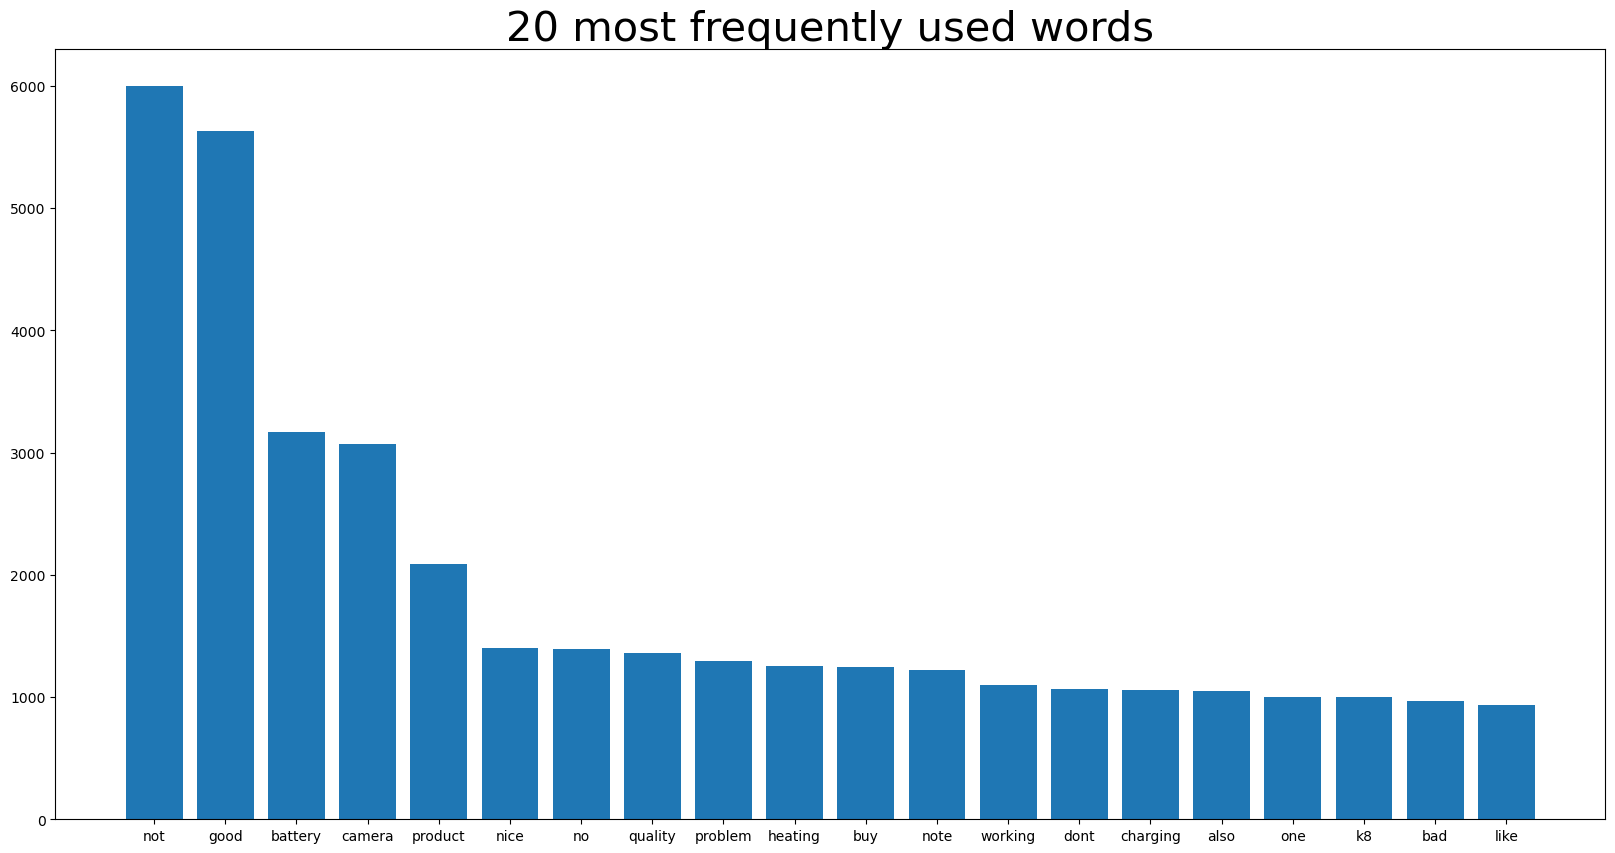

In [38]:
from collections import Counter
word_freq_cnt = Counter(word_list)
# Plotting the most commonly used words:
import matplotlib.pyplot as plt
%matplotlib inline
words=[]
values=[]
for item, frequency in word_freq_cnt.most_common(20):
    words.append(item) 
    values.append(frequency)
plt.figure(figsize= (20,10))
plt.bar(words, values)
plt.title('20 most frequently used words', size=30) 
plt.savefig('./assets/most_common_words.png')
plt.show()

<Figure size 2000x1000 with 0 Axes>

<BarContainer object of 15 artists>

Text(0.5, 1.0, '15 most frequently used Nouns')

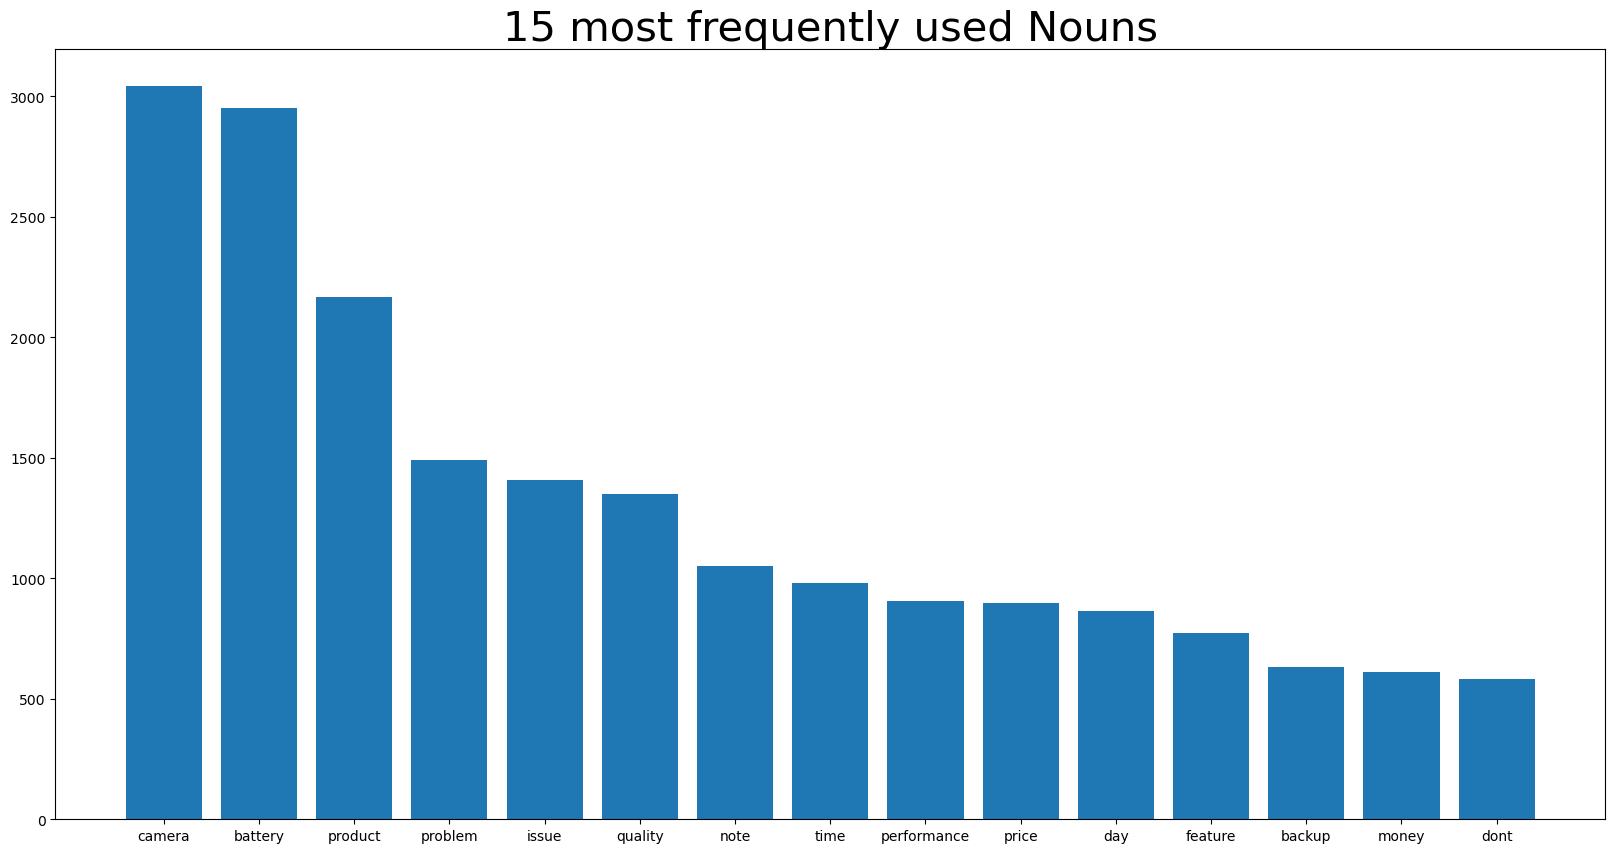

In [39]:
noun_freq_cnt = Counter(nouns_list)
# Plotting the most commonly used nouns:
import matplotlib.pyplot as plt
%matplotlib inline
words=[]
values=[]
for item, frequency in noun_freq_cnt.most_common(15):
    words.append(item) 
    values.append(frequency)
plt.figure(figsize= (20,10))
plt.bar(words, values)
plt.title('15 most frequently used Nouns', size=30) 
plt.savefig('./assets/most_common_nouns.png')
plt.show()

<Figure size 2000x1000 with 0 Axes>

<BarContainer object of 15 artists>

Text(0.5, 1.0, '15 most frequently Verbs')

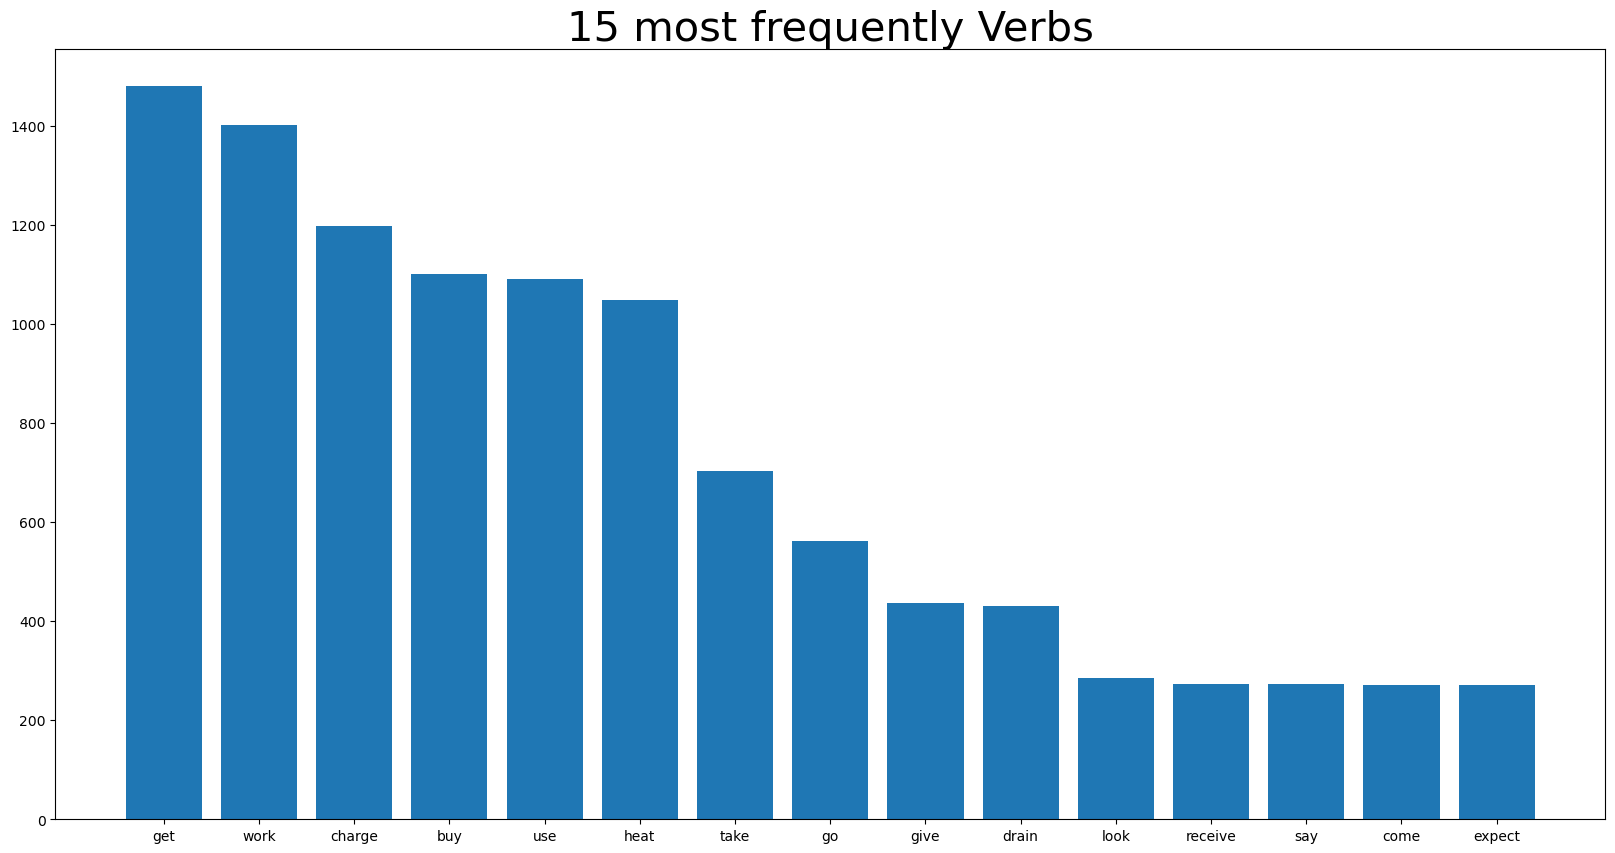

In [40]:
verb_freq_cnt = Counter(verb_list)
# Plotting the most commonly used nouns:
import matplotlib.pyplot as plt
%matplotlib inline
words=[]
values=[]
for item, frequency in verb_freq_cnt.most_common(15):
    words.append(item) 
    values.append(frequency)
plt.figure(figsize= (20,10))
plt.bar(words, values)
plt.title('15 most frequently Verbs', size=30)
plt.savefig('./assets/most_common_verbs.png')
plt.show()

In [41]:
data['review']

0        Good b...
1        Worst ...
2        when I...
3             Good
4        The wo...
           ...    
14670    I real...
14671    The Le...
14672    Awesom...
14673    This p...
14674    Good p...
Name: review, Length: 14667, dtype: object

## 8. Create a topic model using LDA on the cleaned-up data with 12 topics.
    1. Print out the top terms for each topic.
    2. What is the coherence of the model with the c_v metric?

## Linear Dirichlet Allocation(LDA):
LDA is a matrix factorization technique. 
Documents(Reviews) will be represented as document-term matrix.
LDA converts document-term matrix into two lower-dimensional matrix, M1 and M2 where M1 is a document-topic matrix and M2 is a topic-term matrix.It's an iteration process, where each word w of each doc d, word assignment is updated till it reaches a convergence point using Gibs Sampling Technique. 

**Assumption:** 
It worksubder the assumption each document is generated by a statistical generative process i.e, each document is a mixture of topics and each topic is a mixture of words

**Note:** 
1. It is not a determinisitc model. 
2. Every time it will endup generating different results for topics

In [42]:
import gensim

# Creating dictionary and applying filter to select few words
dic_res = gensim.corpora.Dictionary(review_lem) #Creates a dictionary for all words in Corpora
dic_res.filter_extremes(no_below = 25, # Keep tokens which are contained in at least no_below documents.
                        no_above = 0.8, # Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
                        keep_n = None) #Keep only the first keep_n most frequent tokens.

# Convert document into the bag-of-words (BoW) format = list of (token_id, token_count) tuples.
bow_corpus = [dic_res.doc2bow(doc) for doc in review_lem] 
bow_corpus[0:3] # corpus for input data

[[(0, 1), (1, 1), (2, 1)],
 [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2)],
 [(10, 1)]]

In [43]:
print("No of words in dictionary after filtering is: {}".format(len(dic_res)))

No of words in dictionary after filtering is: 384


In [44]:
# Demonstrate how words are connected to numbers in dictionary after filtering
for k, v in dic_res.iteritems():
    if k<10:
        print(k, v) 

0 improvement
1 need
2 update
3 amazon
4 backup
5 battery
6 charger
7 dont
8 hell
9 hour


In [45]:
# Building LDA Model:
lda_model =  gensim.models.LdaMulticore(bow_corpus, num_topics = 12,id2word = dic_res, iterations= 5000, passes = 10,workers = 2)

#### This line of code is used to build an LDA (Latent Dirichlet Allocation) topic model using the Gensim library in Python. Here's a detailed explanation of the parameters and their functionality:

1. `lda_model`: This variable is assigned the result of creating an LDA model using Gensim.

2. `gensim.models.LdaMulticore`: This is the constructor for creating an LDA model in Gensim. It indicates that a multicore implementation of the LDA algorithm will be used, which can speed up the training process by utilizing multiple CPU cores.

3. `bow_corpus`: This parameter represents the bag-of-words (BoW) corpus, which is essentially a document-term matrix where each row corresponds to a document and each column corresponds to a unique word in the entire corpus. The LDA model will be trained on this BoW representation of the text data.

4. `num_topics = 12`: This specifies the number of topics that the LDA model should attempt to identify in the text data. In this case, the model will aim to discover 12 distinct topics present in the corpus.

5. `id2word = dic_res`: This parameter indicates the mapping between word IDs and actual words in the vocabulary. `dic_res` is likely a dictionary where keys are word IDs and values are the corresponding words.

6. `iterations = 5000`: This parameter specifies the maximum number of iterations the LDA algorithm will perform during training. Increasing the number of iterations can lead to better convergence, potentially resulting in higher-quality topics, but it also increases computational time.

7. `passes = 10`: This parameter controls how many times the entire corpus will be passed through the model during training. Each pass processes the entire corpus sequentially. Increasing the number of passes can lead to better convergence and more accurate topics, especially for larger datasets.

8. `workers = 2`: This parameter specifies the number of worker processes to use for parallelization during training. Setting it to 2 indicates that two CPU cores will be utilized for parallel processing, which can speed up training, particularly for larger datasets.

##### Overall, this line of code initializes and trains an LDA topic model using Gensim, aiming to identify 12 topics within the provided text data represented in the bag-of-words format.

In [46]:
#Evaluation of model using Coherence CV metric:
from gensim.models import CoherenceModel
coherence_model = CoherenceModel(model= lda_model,texts= review_lem,dictionary=dic_res,coherence='u_mass')
print('Coherence score with 12 Topics is: ', coherence_model.get_coherence())

Coherence score with 12 Topics is:  -5.552041662763343


#### This block of code is used to evaluate the coherence of the trained LDA (Latent Dirichlet Allocation) topic model using the Coherence CV (Cohesion Validation) metric. Here's a detailed explanation:

1. `from gensim.models import CoherenceModel`: This imports the `CoherenceModel` class from the Gensim library, which is used for computing topic model coherence.

2. `coherence_model = CoherenceModel(model=lda_model, texts=review_lem, dictionary=dic_res, coherence='u_mass')`: This line creates an instance of the `CoherenceModel` class. It takes several parameters:
   - `model`: The trained LDA model (`lda_model`) that we want to evaluate.
   - `texts`: The preprocessed texts (`review_lem`) used for training the LDA model.
   - `dictionary`: The dictionary (`dic_res`) mapping word IDs to words.
   - `coherence='u_mass'`: The coherence metric to be used, in this case, 'u_mass'. There are different coherence metrics available, and 'u_mass' is one of them.

3. `coherence_model.get_coherence()`: This line calculates the coherence score using the specified coherence metric. The `get_coherence()` method computes the coherence score based on the chosen metric.

4. `print('Coherence score with 12 Topics is: ', coherence_model.get_coherence())`: This prints out the coherence score obtained for the LDA model. The coherence score indicates how interpretable and coherent the topics generated by the model are. A higher coherence score generally indicates better topic quality.

##### Overall, this code evaluates the coherence of the LDA topic model with 12 topics using the UMass coherence metric, providing insights into the quality of the topics discovered by the model.

In [47]:
# Generating words of  Each topic:
for idx, topic in lda_model.print_topics(-1):
            print("Topic: {} \nWords: {}".format(idx, topic ))
            print("\n")      

Topic: 0 
Words: 0.094*"battery" + 0.092*"experience" + 0.067*"budget" + 0.054*"drain" + 0.052*"im" + 0.050*"thing" + 0.048*"ok" + 0.043*"fast" + 0.038*"box" + 0.037*"love"


Topic: 1 
Words: 0.316*"price" + 0.119*"range" + 0.064*"hai" + 0.053*"h" + 0.036*"quality" + 0.036*"waste" + 0.025*"ho" + 0.022*"k" + 0.021*"hi" + 0.017*"bhi"


Topic: 2 
Words: 0.114*"note" + 0.061*"screen" + 0.059*"k8" + 0.055*"option" + 0.043*"call" + 0.043*"service" + 0.034*"feature" + 0.023*"center" + 0.021*"cast" + 0.021*"contact"


Topic: 3 
Words: 0.342*"camera" + 0.129*"quality" + 0.076*"performance" + 0.032*"mode" + 0.024*"depth" + 0.018*"front" + 0.015*"picture" + 0.015*"clarity" + 0.013*"battery" + 0.013*"sound"


Topic: 4 
Words: 0.087*"delivery" + 0.060*"lot" + 0.056*"star" + 0.051*"super" + 0.050*"smartphone" + 0.047*"hang" + 0.041*"android" + 0.034*"stock" + 0.033*"mi" + 0.028*"company"


Topic: 5 
Words: 0.135*"feature" + 0.085*"speaker" + 0.060*"display" + 0.050*"everything" + 0.045*"processor" +

1. `for idx, topic in lda_model.print_topics(-1):`: This loop iterates over each topic generated by the LDA model. The `print_topics()` method is used to retrieve the topics along with their word probabilities. The `-1` argument indicates that all topics should be printed.

2. `print("Topic: {} \nWords: {}".format(idx, topic ))`: Within the loop, this line prints the index of the current topic (`idx`) and the words associated with it along with their probabilities (`topic`). The `topic` variable contains a string representation of the words and their probabilities for the current topic.

3. `print("\n")`: This line adds an empty line for better readability between each topic's words.

##### Overall, this code provides a textual representation of the words associated with each topic generated by the LDA model. It's useful for understanding the themes or subjects captured by each topic and for interpreting the results of the topic modeling process.

## 9. Analyze the topics through the business lens i.e., determine which of the topics can be combined.

In [48]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


### `pyLDAvis` is a Python library used for visualizing the topics in a corpus of text documents that have been analyzed using Latent Dirichlet Allocation (LDA), which is a popular technique for topic modeling. Topic modeling is a method used to uncover the main themes or topics present in a collection of documents. LDA is a probabilistic model that represents documents as mixtures of topics, where each topic is a probability distribution over words.

Here are some reasons why `pyLDAvis` is commonly used:

1. **Interactive Visualization**: `pyLDAvis` provides interactive visualizations that allow users to explore the topics and their relationships in the corpus. This interactive nature helps users gain deeper insights into the underlying structure of the text data.

2. **Topic Interpretability**: The visualizations generated by `pyLDAvis` aid in interpreting the topics discovered by LDA. It provides intuitive representations of topics and their associated keywords, making it easier for users to understand and interpret the results.

3. **Topic Comparison**: `pyLDAvis` enables comparison between topics, allowing users to identify similarities and differences between them. This comparative analysis helps in understanding the nuances of the topics and their relationships.

4. **Model Evaluation**: Visualization provided by `pyLDAvis` can also be useful for evaluating the quality of the LDA model. By examining the coherence and distribution of topics, users can assess whether the model has effectively captured the underlying structure of the text data.

5. **Integration with Python Ecosystem**: `pyLDAvis` seamlessly integrates with other Python libraries commonly used for text analysis, such as `gensim` and `scikit-learn`, making it easy to incorporate topic modeling and visualization into existing workflows.

##### Overall, `pyLDAvis` is a valuable tool for anyone working with text data who wants to explore and interpret the topics present in their corpus, making it a popular choice in the field of natural language processing and text mining.

In [49]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

#### `pyLDAvis.gensim` is a module within the `pyLDAvis` package that provides functionality specifically tailored for visualizing topic models generated using the Gensim library's implementation of Latent Dirichlet Allocation (LDA). Gensim is a popular Python library for topic modeling, document similarity analysis, and other natural language processing tasks.

1. **Training a Gensim LDA Model**: First, you would typically use Gensim to train an LDA model on a corpus of text documents. This involves preprocessing the text data, tokenizing it, and then feeding it to the LDA model for training.

2. **Preparing Data for Visualization**: Once you have trained your LDA model, you can use `pyLDAvis.gensim` to prepare the data for visualization. This involves converting the Gensim LDA model and the corresponding corpus into a format that can be visualized using `pyLDAvis`.

3. **Interactive Visualization**: With the data prepared, you can then use `pyLDAvis` functions to generate an interactive visualization of the topics discovered by the LDA model. This visualization allows you to explore the topics, their associated keywords, and the relationships between topics.

4. **Interpreting Results**: The interactive visualization provided by `pyLDAvis` helps in interpreting the topics generated by the LDA model. Users can interactively explore the topics, adjust visualization parameters, and gain insights into the underlying structure of the text data.

##### This code assumes you have already trained a Gensim LDA model (`model`), have the corresponding corpus (`corpus`), and have created a dictionary mapping words to their integer IDs (`dictionary`). You'll need to replace `"your_lda_model_file"`, `"your_corpus_file.pkl"`, and `"your_dictionary_file"` with the actual filenames/path to your model, corpus, and dictionary files.


#### The pickle module in Python is used for serializing and deserializing Python objects. This means it can convert complex objects, such as lists, dictionaries, and custom classes, into a byte stream, which can be stored in a file or transmitted over a network. Later, this byte stream can be converted back into the original object.

In [50]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic_res)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.094740 -0.183357       1        1  12.790295
2     -0.209060  0.050200       2        1  10.432608
6      0.132186  0.184826       3        1  10.429382
11    -0.118000  0.179026       4        1  10.400343
7      0.277465  0.044947       5        1   9.372171
...         ...       ...     ...      ...        ...
8     -0.117829  0.067842       8        1   8.143695
5     -0.136209 -0.229076       9        1   6.893598
1      0.008845 -0.313169      10        1   5.085902
0      0.254207  0.008691      11        1   4.959663
4     -0.190274  0.024913      12        1   4.918502

[12 rows x 5 columns], topic_info=       Term       Freq      Total Category  logprob  loglift
37  product  2017.0...  2017.0...  Default  30.0000  30.0000
44   camera  2886.0...  2886.0...  Default  29.0000  29.0000
5   battery  2863.0...  2863.0...  Default  28.0000  28.0000
51    price  938.00...  938.00...  Default  27.0000  27.0000
11  problem  1381.0...  1381.0...  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
3    amazon  52.284357  469.10...  Topic12  -3.9985   0.8180
66  feature  50.991789  809.37...  Topic12  -4.0235   0.2476
16     note  45.597430  1042.9...  Topic12  -4.1353  -0.1178
7      dont  35.662268  570.04...  Topic12  -4.3811   0.2405
34     time  27.398142  972.36...  Topic12  -4.6447  -0.5571

[511 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3         1  0.002132     amazon
3         2  0.006395     amazon
3         4  0.778084     amazon
3         7  0.089533     amazon
3        10  0.012790     amazon
...     ...       ...        ...
362       2  0.034627  yesterday
362       3  0.727164  yesterday
362      11  0.207761  yesterday
272       1  0.082188    youtube
272       8  0.904066    youtube

[1193 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 7, 12, 8, 10, 11, 9, 6, 2, 1, 5])

In [51]:
pyLDAvis.save_html(LDAvis_prepared, 'LDA_model_vis'+'.html')

#### The code `pyLDAvis.save_html(LDAvis_prepared, 'LDA_model_vis'+'.html')` saves the visualization of the LDA (Latent Dirichlet Allocation) model generated using pyLDAvis library as an HTML file.

1. `pyLDAvis.save_html`: This function is from the `pyLDAvis` library, which is commonly used for interactive topic model visualization.

2. `LDAvis_prepared`: This is the prepared data for visualization, likely generated using functions provided by the `pyLDAvis` library. It contains information about the LDA model, such as topic-term distributions and inter-topic distances, processed for visualization.

3. `'LDA_model_vis' + '.html'`: This specifies the filename for the HTML file that will contain the visualization. The filename is composed of the base name `'LDA_model_vis'` and the extension `.html`.

##### When executed, this line of code saves the visualization of the LDA model as an HTML file with the specified filename, allowing you to open and view it in a web browser. This HTML file typically includes interactive elements that enable exploration of the topics and their relationships within the model.

## 10. Create topic model using LDA with the optimal number of topics

In [52]:
def compute_coherence_score(corpus,id2word,k):
    lda_model = gensim.models.LdaMulticore(corpus = corpus, num_topics = k,id2word =dic_res, passes=10, random_state= 1607, iterations= 50, per_word_topics= True)
    coherence_model_lda = CoherenceModel(model= lda_model, texts= review_lem,dictionary= dic_res,coherence='u_mass') 
    coherence_score = coherence_model_lda.get_coherence()
    return coherence_score

#### This function, `compute_coherence_score`, is designed to calculate the coherence score for a given LDA (Latent Dirichlet Allocation) topic model. 

1. **Parameters**:
   - `corpus`: This parameter represents the corpus in the form of a document-term matrix. It is typically generated using techniques like Bag of Words (BoW) or TF-IDF.
   - `id2word`: This parameter represents the mapping between word IDs and actual words in the vocabulary.
   - `k`: This parameter specifies the number of topics to be generated by the LDA model.

2. **LDA Model Training**:
   - Inside the function, an LDA model is trained using the `gensim.models.LdaMulticore` class. It takes several parameters:
     - `corpus`: The document-term matrix representing the corpus.
     - `num_topics`: The number of topics to be generated.
     - `id2word`: The dictionary mapping word IDs to words.
     - `passes`: The number of passes over the corpus during training.
     - `random_state`: A seed for the random number generator, ensuring reproducibility.
     - `iterations`: The maximum number of iterations for the LDA algorithm.
     - `per_word_topics`: Whether to include per-word topic distribution in the output.

3. **Coherence Score Calculation**:
   - After training the LDA model, a `CoherenceModel` object is created to compute the coherence score. It takes the following parameters:
     - `model`: The trained LDA model.
     - `texts`: The preprocessed texts used for training.
     - `dictionary`: The dictionary mapping word IDs to words.
     - `coherence`: The coherence metric to be used, in this case, 'u_mass'.
   - The coherence score is obtained using the `get_coherence()` method of the `CoherenceModel` object.

4. **Return**:
   - The computed coherence score is returned as the output of the function.

##### Overall, this function encapsulates the process of training an LDA model, computing its coherence score, and returning the score as a result. It provides a convenient way to assess the quality of topic modeling results for different numbers of topics.

In [53]:
# Find the number of topic for which the coherence score is highest
# cs is empty list which captures the number of topics and their corresponding score as a tuple.
cs=[]
for i in range(4,11):
    score = compute_coherence_score(corpus=bow_corpus,id2word=dic_res,k=i) 
    print('\nCoherence score with ', i, 'Topics is: ', score ) 
    cs.append((i,score))


Coherence score with  4 Topics is:  -3.416772412960634

Coherence score with  5 Topics is:  -3.365592199541875

Coherence score with  6 Topics is:  -3.3953737594321525

Coherence score with  7 Topics is:  -3.869639819105299

Coherence score with  8 Topics is:  -3.947302939835011

Coherence score with  9 Topics is:  -4.007201631485939

Coherence score with  10 Topics is:  -4.418942614783341


#### This code snippet aims to find the number of topics for which the coherence score is highest within a specified range. 

1. **Initialization**:
   - An empty list named `cs` is initialized. This list will capture the number of topics and their corresponding coherence scores as tuples.

2. **Loop**:
   - The loop iterates over a range of values from 4 to 10 (inclusive), representing the number of topics to be evaluated.

3. **Coherence Score Computation**:
   - For each iteration, the `compute_coherence_score` function is called with the following parameters:
     - `corpus`: `bow_corpus`, which is the bag-of-words representation of the corpus.
     - `id2word`: `dic_res`, which is the dictionary mapping word IDs to words.
     - `k`: The current value of `i`, representing the number of topics to be generated.
   - The computed coherence score is stored in the variable `score`.

4. **Print and Append**:
   - The coherence score for each number of topics is printed along with the corresponding number of topics.
   - Each `(number of topics, coherence score)` tuple is appended to the `cs` list.

Text(0.5, 1.0, 'Coherence Score vs  Number of Topics')

Text(0.5, 0, 'Number of Topics')

Text(0, 0.5, 'Coherence Score')

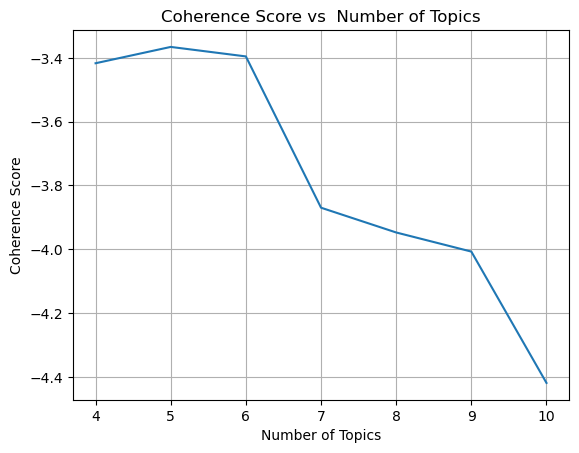

In [54]:
# Plot the distribution of score for topics
x = [val[0] for val in cs]
y= [val[1] for val in cs]
plt.plot(x,y)
plt.title('Coherence Score vs  Number of Topics') 
plt.grid(True)
plt.xlabel('Number of Topics') 
plt.ylabel('Coherence Score') 
plt.savefig('./assets/Coherence_Score Vs Number_of_Topics.png')
plt.show()

### u_mass Coherence score  lies between -14 to 14 typically and close to zero is considered as better. Hence, we can go ahead with 4 topics.

## <span style="color:crimson;"> Alert: </span> 
### As LDA is a non determistic model like human brains 😛, everytime you may end up with different no. of optimal topics!

In [55]:
from operator import itemgetter
tps = max(cs, key=itemgetter(1))[0]
print('Optimum number of topics for highest Coherence score is: ', tps)

Optimum number of topics for highest Coherence score is:  5


#### This part of the code snippet aims to find the optimal number of topics that yield the highest coherence score from the `cs` list, which contains tuples of the form `(number of topics, coherence score)`.

1. **Import**:
   - The `itemgetter` function is imported from the `operator` module. This function will be used to extract elements from the tuples within the `cs` list.

2. **Finding the Optimal Number of Topics**:
   - The `max` function is used to find the tuple with the highest coherence score within the `cs` list. The `key` parameter specifies that the comparison should be based on the second element of each tuple (i.e., the coherence score).
   - The result is stored in the variable `tps`, which represents the optimal number of topics.

3. **Printing the Result**:
   - The optimal number of topics (`tps`) is printed out along with a descriptive message.

##### We'll obtain the optimal number of topics that yield the highest coherence score. This number represents the suggested number of topics for the given corpus and modeling parameters, providing valuable insight into the topic structure of the data.

## 11. The business should be able to interpret the topics

In [56]:
# Building the final LDA model using the optimum number of topics
# Here we have tuned few hyperparamaters for better accuracy of the model.
lda_model_final = gensim.models.LdaMulticore(corpus = bow_corpus, num_topics = tps,id2word = dic_res, passes=10,random_state = 1607, iterations= 50, per_word_topics = True)
coherence_model_lda_final = CoherenceModel(model= lda_model_final, texts= review_lem,dictionary= dic_res,coherence='u_mass') 
coherence_score_final = coherence_model_lda_final.get_coherence()
print('Coherence score for ',tps,' Topics is: ', coherence_score_final)

Coherence score for  5  Topics is:  -3.367761350970281


#### This code segment builds the final LDA (Latent Dirichlet Allocation) model using the optimum number of topics determined earlier and fine-tuning some hyperparameters for better accuracy.

1. **Building the LDA Model**:
   - An LDA model named `lda_model_final` is instantiated using `gensim.models.LdaMulticore`.
   - The `corpus` parameter is set to `bow_corpus`, which represents the bag-of-words representation of the corpus.
   - `num_topics` is set to `tps`, representing the optimal number of topics determined earlier.
   - `id2word` is set to `dic_res`, which is the dictionary mapping word IDs to words.
   - Other hyperparameters such as `passes`, `random_state`, `iterations`, and `per_word_topics` are set similarly to the previous LDA model instantiation.

2. **Calculating Coherence Score**:
   - A `CoherenceModel` object named `coherence_model_lda_final` is created to compute the coherence score for the final LDA model.
   - The `model` parameter is set to `lda_model_final`, which is the trained LDA model.
   - `texts` and `dictionary` parameters are set to `review_lem` and `dic_res` respectively.
   - `coherence` is set to `'u_mass'`, indicating the coherence metric to be used.
   
3. **Printing Coherence Score**:
   - The coherence score for the final LDA model is obtained using the `get_coherence()` method of the `CoherenceModel` object.
   - The coherence score is then printed out along with the number of topics used in the model.

##### We'll obtain the final LDA model with the optimal number of topics and its associated coherence score. This final model is tuned to potentially provide better accuracy in representing the underlying topics within the corpus.

In [57]:
# Generating words of  Each topic:
for idx, topic in lda_model_final.print_topics(-1):
            print("Topic: {} \nWords: {}".format(idx, topic ))
            print("\n")     

Topic: 0 
Words: 0.154*"camera" + 0.120*"product" + 0.047*"performance" + 0.032*"quality" + 0.030*"price" + 0.020*"battery" + 0.020*"superb" + 0.019*"range" + 0.019*"awesome" + 0.015*"clarity"


Topic: 1 
Words: 0.053*"money" + 0.051*"price" + 0.051*"feature" + 0.030*"screen" + 0.026*"waste" + 0.025*"quality" + 0.023*"dont" + 0.022*"doesnt" + 0.019*"value" + 0.017*"work"


Topic: 2 
Words: 0.152*"battery" + 0.063*"camera" + 0.047*"quality" + 0.032*"note" + 0.030*"hour" + 0.028*"backup" + 0.026*"day" + 0.019*"life" + 0.018*"charge" + 0.017*"time"


Topic: 3 
Words: 0.112*"problem" + 0.110*"issue" + 0.057*"battery" + 0.042*"month" + 0.038*"heating" + 0.034*"charger" + 0.030*"time" + 0.030*"network" + 0.017*"charge" + 0.015*"turbo"


Topic: 4 
Words: 0.043*"product" + 0.036*"call" + 0.032*"service" + 0.029*"return" + 0.027*"note" + 0.027*"amazon" + 0.025*"device" + 0.024*"buy" + 0.022*"heat" + 0.022*"hai"




#### Used to print the words associated with each topic in the final LDA (Latent Dirichlet Allocation) model.

1. **Looping through Topics**:
   - The code iterates over each topic generated by the final LDA model.

2. **Printing Topic and Words**:
   - For each topic, the index (`idx`) and the words associated with it (`topic`) are printed out.
   - The `print_topics()` method is used to retrieve the words associated with each topic.
   - The `-1` argument indicates that all topics should be printed.

3. **Formatting**:
   - The printed output is formatted to display the topic index and its associated words.
   - Each topic's words are printed on a separate line for clarity.

4. **Separator**:
   - An empty line (`print("\n")`) is printed after each topic's words for better readability.

##### Obtaining a textual representation of the words associated with each topic in the final LDA model. This information helps in understanding the themes or subjects captured by each topic and interpreting the results of the topic modeling process.

In [58]:
topic_words = {}

for idx, topic in lda_model_final.print_topics(-1): 
    temp = []
    for item in topic.split('+'):
        item_alpha = [letter for letter in item if letter.isalpha()]
        temp.append("".join(item_alpha))    
    topic_words[('Topic_'+str(idx+1))] = temp

topic_table = pd.DataFrame(topic_words)    
topic_table.index = ['Word_'+str(i+1) for i in range(topic_table.shape[0])]
topic_table

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
Word_1,camera,money,battery,problem,product
Word_2,product,price,camera,issue,call
Word_3,perfor...,feature,quality,battery,service
Word_4,quality,screen,note,month,return
Word_5,price,waste,hour,heating,note
Word_6,battery,quality,backup,charger,amazon
Word_7,superb,dont,day,time,device
Word_8,range,doesnt,life,network,buy
Word_9,awesome,value,charge,charge,heat
Word_10,clarity,work,time,turbo,hai


#### Creating a table of words associated with each topic in the final LDA (Latent Dirichlet Allocation) model.

1. **Initialization**:
   - An empty dictionary named `topic_words` is initialized. This dictionary will store the words associated with each topic.
   
2. **Looping through Topics**:
   - The code iterates over each topic generated by the final LDA model.
   - For each topic, the index (`idx`) and the words associated with it (`topic`) are retrieved using the `print_topics()` method.

3. **Parsing Words**:
   - For each word in the topic, the code removes any non-alphabetic characters, keeping only the alphabetic characters.
   - The cleaned word is then appended to a temporary list (`temp`), which holds all the words associated with the current topic.

4. **Storing Words**:
   - The temporary list of words (`temp`) for each topic is stored in the `topic_words` dictionary, with keys formatted as `'Topic_'` followed by the topic index.

5. **Creating DataFrame**:
   - A pandas DataFrame named `topic_table` is created using the `topic_words` dictionary.
   - The index of the DataFrame is set to consecutive numbers starting from 1, representing the words associated with each topic.

Obtaining a DataFrame (`topic_table`) containing the words associated with each topic in the final LDA model. This tabular representation makes it easier to analyze and interpret the topics discovered by the model.

In [59]:
x = lda_model_final.show_topics(formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

for topic, words in topics_words:
    print(str(topic)+"::"+str(words))
    
print()

0::['camera', 'product', 'performance', 'quality', 'price', 'battery', 'superb', 'range', 'awesome', 'clarity']
1::['money', 'price', 'feature', 'screen', 'waste', 'quality', 'dont', 'doesnt', 'value', 'work']
2::['battery', 'camera', 'quality', 'note', 'hour', 'backup', 'day', 'life', 'charge', 'time']
3::['problem', 'issue', 'battery', 'month', 'heating', 'charger', 'time', 'network', 'charge', 'turbo']
4::['product', 'call', 'service', 'return', 'note', 'amazon', 'device', 'buy', 'heat', 'hai']



##### The code is designed to extract and print the words associated with each topic in the final LDA (Latent Dirichlet Allocation) model. It starts by fetching the topics from the LDA model along with the words that contribute to each topic. Then, it loops through each topic and its corresponding words. For each topic, it prints the topic number followed by a list of words that are significant in that topic. This provides insight into what each topic is about, as each word in the list represents a key theme or concept captured by the model. Overall, this process helps in understanding the main topics discovered by the LDA model in the analyzed text data.

## 12. Visualize the topics

In [60]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

In [61]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_final, bow_corpus, dic_res)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.011213  0.108535       1        1  23.805360
0     -0.202818  0.091396       2        1  20.067321
4      0.097395 -0.182526       3        1  18.826086
3      0.215252  0.098100       4        1  18.760159
1     -0.121042 -0.115504       5        1  18.541073, topic_info=        Term       Freq      Total Category  logprob  loglift
44    camera  2883.0...  2883.0...  Default  30.0000  30.0000
54     issue  1357.0...  1357.0...  Default  29.0000  29.0000
11   problem  1461.0...  1461.0...  Default  28.0000  28.0000
37   product  1985.0...  1985.0...  Default  27.0000  27.0000
5    battery  3065.0...  3065.0...  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
113    sound  114.45...  281.64...   Topic5  -4.5420   0.7847
62       day  161.67...  915.51...   Topic5  -4.1966  -0.0487
135    music  103.48...  258.74...   Topic5  -4.6427   0.7688
34      time  115.14...  962.21...   Topic5  -4.5360  -0.4379
16      note  99.424245  1076.8...   Topic5  -4.6828  -0.6973

[296 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3         1  0.233150     amazon
3         2  0.007441     amazon
3         3  0.726733     amazon
3         4  0.004961     amazon
3         5  0.029764     amazon
...     ...       ...        ...
362       5  0.025457  yesterday
272       1  0.707300    youtube
272       2  0.070730    youtube
272       3  0.141460    youtube
272       4  0.070730    youtube

[832 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 5, 4, 2])

#### Utilizing the pyLDAvis library to visualize the topics generated by the final LDA (Latent Dirichlet Allocation) model.

1. **Enabling Notebook**:
   - `pyLDAvis.enable_notebook()` enables the use of pyLDAvis within Jupyter Notebook, allowing for interactive visualization directly in the notebook environment.

2. **Preparing Visualization Data**:
   - `pyLDAvis.gensim.prepare()` prepares the data required for visualization using the LDA model (`lda_model_final`), the bag-of-words corpus (`bow_corpus`), and the dictionary mapping word IDs to words (`dic_res`).
   - The prepared data (`LDAvis_prepared`) contains information such as the topic-term distributions, inter-topic distances, and relevance of terms for each topic.

3. **Return Visualization Data**:
   - The prepared data (`LDAvis_prepared`) is returned, which can be used to visualize the topics using pyLDAvis.

##### By executing this code in a Jupyter Notebook environment, We'll obtain an interactive visualization of the topics generated by the final LDA model. This visualization helps in exploring the topics, understanding their relationships, and identifying the key terms associated with each topic within the corpus.

<Figure size 2000x4000 with 0 Axes>

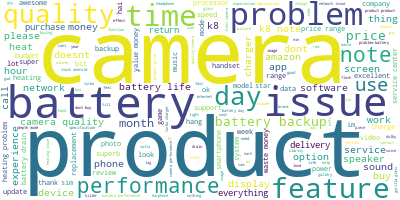

<Figure size 2000x4000 with 0 Axes>

In [62]:
# Word Cloud to understand what topics are discussed in general
from wordcloud import WordCloud # Import the wordcloud library
long_string = ','.join(nouns_list) # Join the different processed titles together.
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue') # Create a WordCloud object
plt.figure(figsize=[20,40])
wordcloud.generate(long_string) # Generate a word cloud
wordcloud.to_image()# Visualize the word cloud
wordcloud.to_file("./assets/wordcloud.png")

In [63]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

lda_model = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                           id2word=dic_res,
                                           num_topics=tps, 
                                           random_state=1607,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[bow_corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10451 samples in 0.003s...
[t-SNE] Computed neighbors for 10451 samples in 0.143s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10451
[t-SNE] Computed conditional probabilities for sample 2000 / 10451
[t-SNE] Computed conditional probabilities for sample 3000 / 10451
[t-SNE] Computed conditional probabilities for sample 4000 / 10451
[t-SNE] Computed conditional probabilities for sample 5000 / 10451
[t-SNE] Computed conditional probabilities for sample 6000 / 10451
[t-SNE] Computed conditional probabilities for sample 7000 / 10451
[t-SNE] Computed conditional probabilities for sample 8000 / 10451
[t-SNE] Computed conditional probabilities for sample 9000 / 10451
[t-SNE] Computed conditional probabilities for sample 10000 / 10451
[t-SNE] Computed conditional probabilities for sample 10451 / 10451
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.089218
[t-SNE] KL 

Loading BokehJS ...

#### Visualize the dominant topics within the corpus using t-SNE dimension reduction and Bokeh for plotting.

1. **LDA Model Initialization**:
   - An LDA (Latent Dirichlet Allocation) model named `lda_model` is initialized using `gensim.models.ldamodel.LdaModel`.
   - Parameters such as `corpus`, `id2word`, `num_topics`, `random_state`, `update_every`, `chunksize`, `passes`, `alpha`, `iterations`, and `per_word_topics` are specified to configure the LDA model.

2. **Topic Weight Extraction**:
   - The code iterates over each document in the bag-of-words corpus (`bow_corpus`) and extracts the topic weights from the LDA model predictions.
   - These topic weights are stored in the `topic_weights` list.

3. **Array Transformation**:
   - The list of topic weights (`topic_weights`) is converted into a NumPy array (`arr`) and filled with zeros for missing values.

4. **Filtering Well-Separated Points**:
   - Optional: Points with a maximum topic weight below a certain threshold (0.35 in this case) are filtered out to keep only well-separated points.

5. **Dominant Topic Determination**:
   - The dominant topic number for each document is determined by finding the index of the maximum topic weight in each row of the `arr` array.

6. **t-SNE Dimension Reduction**:
   - t-SNE (t-Distributed Stochastic Neighbor Embedding) dimension reduction is performed on the topic weights using `TSNE` from `sklearn.manifold`.
   - It reduces the dimensionality of the data to 2 for visualization purposes.

7. **Plotting with Bokeh**:
   - Bokeh is used to create an interactive plot of the topic clusters.
   - The `output_notebook()` function is called to enable visualization within a Jupyter Notebook environment.

##### By executing this code in a Jupyter Notebook, We'll obtain an interactive plot visualizing the dominant topics within the corpus using t-SNE dimension reduction and Bokeh for plotting. This visualization helps in understanding the distribution and relationships between different topics across the documents.

In [64]:
import matplotlib.colors as mcolors
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(tps), 
              width=900, height=700)

plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
plt.savefig('./assets/t-SNE_Clustering_of_5_LDA_Topics.png')
show(plot)

GlyphRenderer(id='p1036', ...)

<Figure size 640x480 with 0 Axes>

#### Uses Bokeh to create a scatter plot for visualizing the t-SNE clustering of LDA topics.

1. **Importing Matplotlib Colors**:
   - The `matplotlib.colors` module is imported as `mcolors` to access a set of predefined colors.

2. **Defining Colors**:
   - A numpy array named `mycolors` is created to store the colors. These colors are extracted from the predefined Tableau color palette using a list comprehension.

3. **Creating the Plot**:
   - A Bokeh figure named `plot` is initialized with a title that indicates the number of LDA topics (`tps`) being visualized.
   - The width and height of the plot are specified as 900 and 700, respectively.

4. **Scatter Plot**:
   - The `scatter()` method is used to create a scatter plot on the `plot` figure.
   - The x and y coordinates of the scatter plot are set to the two dimensions obtained from t-SNE dimension reduction (`tsne_lda[:,0]` and `tsne_lda[:,1]`).
   - The color of each point is determined by the corresponding dominant topic number (`topic_num`), and the colors are chosen from the `mycolors` array.

5. **Displaying the Plot**:
   - The `show()` function is called to display the plot.

##### Well obtain an interactive scatter plot visualizing the t-SNE clustering of LDA topics. Each point in the plot represents a document, and its color corresponds to the dominant topic assigned to that document. This visualization provides insights into the distribution and clustering of documents based on their dominant topics.

##  <div style="text-align: right" > - Paras Agrawal </div>